# Pakistan Used Car Prices 2023

A solution for : https://www.kaggle.com/datasets/talhabarkaatahmad/pakistan-used-car-prices-2023

# Task 1

Preparing csv File.

In [532]:
#Importing needed modules.
from pandas import read_csv , concat , DataFrame , get_dummies
from pandas.plotting import scatter_matrix
from matplotlib.pyplot import show , bar , xlabel , ylabel , title , figure , xticks
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor 
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

In [533]:
#Instancing from SimpleImputer , StandardScaler , LabelEncoder objects
imputer_mean = SimpleImputer()
imputer_mf = SimpleImputer(strategy='most_frequent')
imputer_constant = SimpleImputer(strategy='constant',fill_value='Non-imported')
scaler = StandardScaler()
encoder = LabelEncoder()

In [534]:
#Reading csv file and getting ten samples randomly .
path = "D:\\datasets\\pakwheels_used_cars\\pakwheels_used_car_data_v02.csv"
file = read_csv(path)
df = file.copy()
df.sample(10)

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
68001,7810249,Islamabad,Imported,NaN,Suzuki,Khyber,1993.0,1000.0,Manual,Petrol,White,Rawalpindi,90000,470000.0
54920,7849206,Faisalabad,NaN,Hatchback,Suzuki,Alto,2010.0,1000.0,Manual,Petrol,Graphite Grey,Faisalabad,125000,1020000.0
46562,7869178,Talagang,NaN,Single Cabin,Toyota,Hilux,2013.0,2500.0,Manual,Diesel,Super White,Islamabad,114000,4450000.0
16832,7926897,Islamabad,NaN,NaN,Suzuki,Bolan,2016.0,800.0,Manual,Petrol,White,Islamabad,60000,1300000.0
70049,7802458,Lahore,NaN,Sedan,Suzuki,Baleno,2003.0,1300.0,Manual,Petrol,White,Punjab,160000,1250000.0
52337,7855423,Sahiwal,NaN,Sedan,Honda,City,2015.0,1300.0,Manual,Petrol,Modern Steel Metallic,Lahore,170000,2950000.0
53266,7853190,Lahore,NaN,Sedan,Toyota,Corolla,2021.0,1799.0,Automatic,Petrol,Super White,Punjab,66000,6600000.0
5873,7938802,Sohawa,Imported,NaN,Daihatsu,Hijet,2009.0,660.0,Manual,Petrol,White,Islamabad,361178,1100000.0
17471,7926062,Lahore,NaN,Sedan,Toyota,Corolla,2012.0,1300.0,Manual,Petrol,Maroon,Punjab,117777,2100000.0
73375,7789908,Lahore,NaN,Hatchback,Suzuki,Mehran,2004.0,800.0,Manual,Petrol,Silver Metallic,Punjab,80000,600000.0


In [535]:
#Getting information from file.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77878 entries, 0 to 77877
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   addref        77878 non-null  int64  
 1   city          77878 non-null  object 
 2   assembly      24189 non-null  object 
 3   body          68974 non-null  object 
 4   make          77878 non-null  object 
 5   model         77878 non-null  object 
 6   year          73099 non-null  float64
 7   engine        77875 non-null  float64
 8   transmission  77878 non-null  object 
 9   fuel          76972 non-null  object 
 10  color         76398 non-null  object 
 11  registered    77878 non-null  object 
 12  mileage       77878 non-null  int64  
 13  price         77295 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 8.3+ MB


# Task 2

There are some columns with null datas. At first let's separate them from non-null columns.

In [536]:
df.isnull().sum()

addref              0
city                0
assembly        53689
body             8904
make                0
model               0
year             4779
engine              3
transmission        0
fuel              906
color            1480
registered          0
mileage             0
price             583
dtype: int64

In [537]:
df = df.drop(['addref'],axis=1)

In [538]:
price = DataFrame(imputer_mean.fit_transform(df.price.to_numpy().reshape(-1,1)),columns=['price'])
df = df.drop(['price'],axis=1)
null_cols = [col for col in df.isnull().columns if any(df.isnull()[col])]
df_non_null = df.drop(null_cols,axis=1)
df_null = df.drop(df_non_null.columns,axis=1)

In [539]:
price.describe()

,price
count,7.787800e+04
mean,3.883232e+06
std,5.737881e+06
min,1.100000e+05
25%,1.450000e+06
50%,2.700000e+06
75%,4.500000e+06
max,5.290000e+08


In [540]:
df_non_null.head()

,city,make,model,transmission,registered,mileage
0,Peshawar,Toyota,Corolla,Manual,Lahore,145000
1,Lahore,Honda,City,Manual,Lahore,230000
2,Lahore,Toyota,Yaris,Manual,Punjab,60500
3,Lahore,Suzuki,Swift,Manual,Islamabad,87000
4,Lahore,Honda,Civic,Automatic,Lahore,86000


In [541]:
df_null.head()

,assembly,body,year,engine,fuel,color
0,NaN,Sedan,2013.0,1300.0,Petrol,Silver Metallic
1,NaN,Sedan,2000.0,1300.0,Petrol,Blue
2,NaN,Sedan,2021.0,1300.0,Petrol,Super White
3,NaN,Hatchback,2017.0,1300.0,Petrol,Grey
4,NaN,Sedan,2017.0,1800.0,Petrol,Grey


# Task 3

Encoding non-null columns.

In [542]:
for col in [i for i in df_non_null.columns if df_non_null[i].dtype == 'O'] :
    print(col)
    print(len(df_non_null[col].unique()))

city
297
make
68
model
435
transmission
2
registered
121


In [543]:
transmission = get_dummies(df_non_null.transmission)
city = DataFrame(encoder.fit_transform(df_non_null.city),columns=['city'])
make = DataFrame(encoder.fit_transform(df_non_null.make),columns=['make'])
model = DataFrame(encoder.fit_transform(df_non_null.model),columns=['model'])
registered = DataFrame(encoder.fit_transform(df_non_null.registered),columns=['registered'])

In [544]:
finall_non_null = concat([transmission,city,make,model,registered],axis=1)

In [545]:
finall_non_null.head()

,Automatic,Manual,city,make,model,registered
0,0,1,214,62,121,64
1,0,1,162,27,109,64
2,0,1,162,62,421,93
3,0,1,162,60,365,47
4,1,0,162,27,110,64


# Task 4

Imputing and encoding null cells in null columns.

In [546]:
assembly = DataFrame(imputer_constant.fit_transform(df_null.assembly.to_numpy().reshape(-1,1)),columns=['assembly'])
df_null = df_null[[col for col in df_null.columns if col != 'assembly']]
new_df_null = DataFrame(imputer_mf.fit_transform(df_null),columns=df_null.columns)

In [547]:
finall_null = concat([assembly,new_df_null],axis=1)
finall_null.head()

,assembly,body,year,engine,fuel,color
0,Non-imported,Sedan,2013.0,1300.0,Petrol,Silver Metallic
1,Non-imported,Sedan,2000.0,1300.0,Petrol,Blue
2,Non-imported,Sedan,2021.0,1300.0,Petrol,Super White
3,Non-imported,Hatchback,2017.0,1300.0,Petrol,Grey
4,Non-imported,Sedan,2017.0,1800.0,Petrol,Grey


In [548]:
finall_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77878 entries, 0 to 77877
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   assembly  77878 non-null  object
 1   body      77878 non-null  object
 2   year      77878 non-null  object
 3   engine    77878 non-null  object
 4   fuel      77878 non-null  object
 5   color     77878 non-null  object
dtypes: object(6)
memory usage: 3.6+ MB


In [549]:
for col in finall_null.columns :
    print(col)
    print(len(finall_null[col].unique()))

assembly
2
body
21
year
33
engine
229
fuel
3
color
396


In [550]:
assembly_fuel = finall_null[['assembly','fuel']]
year = finall_null.year.astype('int64')
engine = finall_null.engine.astype('int64')
encoded_body = DataFrame(encoder.fit_transform(finall_null.body),columns=['body'])
encoded_color = DataFrame(encoder.fit_transform(finall_null.color),columns=['color'])
encoded_assembly_fuel = get_dummies(assembly_fuel)

In [551]:
concated_finall = concat([year,engine,encoded_body,encoded_color,encoded_assembly_fuel],axis=1)

In [552]:
concated_finall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77878 entries, 0 to 77877
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   year                   77878 non-null  int64
 1   engine                 77878 non-null  int64
 2   body                   77878 non-null  int32
 3   color                  77878 non-null  int32
 4   assembly_Imported      77878 non-null  uint8
 5   assembly_Non-imported  77878 non-null  uint8
 6   fuel_Diesel            77878 non-null  uint8
 7   fuel_Hybrid            77878 non-null  uint8
 8   fuel_Petrol            77878 non-null  uint8
dtypes: int32(2), int64(2), uint8(5)
memory usage: 2.2 MB


# Task 5

Finalizing data frame. 

In [553]:
Finall_DF = concat([finall_non_null,concated_finall],axis=1)

In [554]:
Finall_DF.head()

,Automatic,Manual,city,make,model,registered,year,engine,body,color,assembly_Imported,assembly_Non-imported,fuel_Diesel,fuel_Hybrid,fuel_Petrol
0,0,1,214,62,121,64,2013,1300,16,316,0,1,0,0,1
1,0,1,162,27,109,64,2000,1300,16,44,0,1,0,0,1
2,0,1,162,62,421,93,2021,1300,16,345,0,1,0,0,1
3,0,1,162,60,365,47,2017,1300,7,167,0,1,0,0,1
4,1,0,162,27,110,64,2017,1800,16,167,0,1,0,0,1


In [555]:
Finall_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77878 entries, 0 to 77877
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Automatic              77878 non-null  uint8
 1   Manual                 77878 non-null  uint8
 2   city                   77878 non-null  int32
 3   make                   77878 non-null  int32
 4   model                  77878 non-null  int32
 5   registered             77878 non-null  int32
 6   year                   77878 non-null  int64
 7   engine                 77878 non-null  int64
 8   body                   77878 non-null  int32
 9   color                  77878 non-null  int32
 10  assembly_Imported      77878 non-null  uint8
 11  assembly_Non-imported  77878 non-null  uint8
 12  fuel_Diesel            77878 non-null  uint8
 13  fuel_Hybrid            77878 non-null  uint8
 14  fuel_Petrol            77878 non-null  uint8
dtypes: int32(6), int64(2), uint8(7)
memo

In [556]:
ready_df = DataFrame(scaler.fit_transform(Finall_DF),columns=Finall_DF.columns)
ready_df.describe()

,Automatic,Manual,city,make,model,registered,year,engine,body,color,assembly_Imported,assembly_Non-imported,fuel_Diesel,fuel_Hybrid,fuel_Petrol
count,7.787800e+04,7.787800e+04,7.787800e+04,7.787800e+04,7.787800e+04,7.787800e+04,7.787800e+04,7.787800e+04,7.787800e+04,7.787800e+04,7.787800e+04,7.787800e+04,7.787800e+04,7.787800e+04,7.787800e+04
mean,8.739618e-14,-8.739666e-14,2.139857e-15,-4.719228e-15,-4.093889e-16,-1.978047e-15,2.743992e-15,-6.243170e-15,1.630299e-15,9.530315e-16,-1.872698e-15,1.872698e-15,3.361862e-15,-1.705478e-14,2.027192e-14
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-1.103539e+00,-9.061754e-01,-2.445264e+00,-2.781546e+00,-1.662488e+00,-2.880338e+00,-3.091034e+00,-1.994582e+00,-2.644832e+00,-1.976332e+00,-6.712222e-01,-1.489820e+00,-2.155271e-01,-1.964911e-01,-3.355651e+00
25%,-1.103539e+00,-9.061754e-01,-7.514588e-01,-1.220911e+00,-6.615228e-01,-9.871023e-01,-7.046502e-01,-5.792785e-01,-1.127678e+00,-7.298383e-01,-6.712222e-01,-1.489820e+00,-2.155271e-01,-1.964911e-01,2.980048e-01
50%,9.061754e-01,-9.061754e-01,-1.101150e-01,6.865310e-01,-4.522301e-01,-3.023149e-01,2.233879e-01,-1.534097e-01,8.229484e-01,4.699118e-01,-6.712222e-01,6.712222e-01,-2.155271e-01,-1.964911e-01,2.980048e-01
75%,9.061754e-01,1.103539e+00,6.298970e-01,8.021336e-01,5.760341e-01,8.658520e-01,8.862722e-01,2.724591e-01,8.229484e-01,9.061845e-01,1.489820e+00,6.712222e-01,-2.155271e-01,-1.964911e-01,2.980048e-01
max,9.061754e-01,1.103539e+00,2.422371e+00,1.091140e+00,2.286774e+00,1.953456e+00,1.151426e+00,1.929460e+01,1.689894e+00,1.100949e+00,1.489820e+00,6.712222e-01,4.639787e+00,5.089289e+00,2.980048e-01


# Task 6

Having some intuition on datas.

In [557]:
temp = ready_df[['year','engine']]
temp['label'] = price
Corr = temp.corr()
Corr['label'].sort_values(ascending=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_15860\1782792372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['label'] = price


label     1.000000
engine    0.455646
year      0.270010
Name: label, dtype: float64

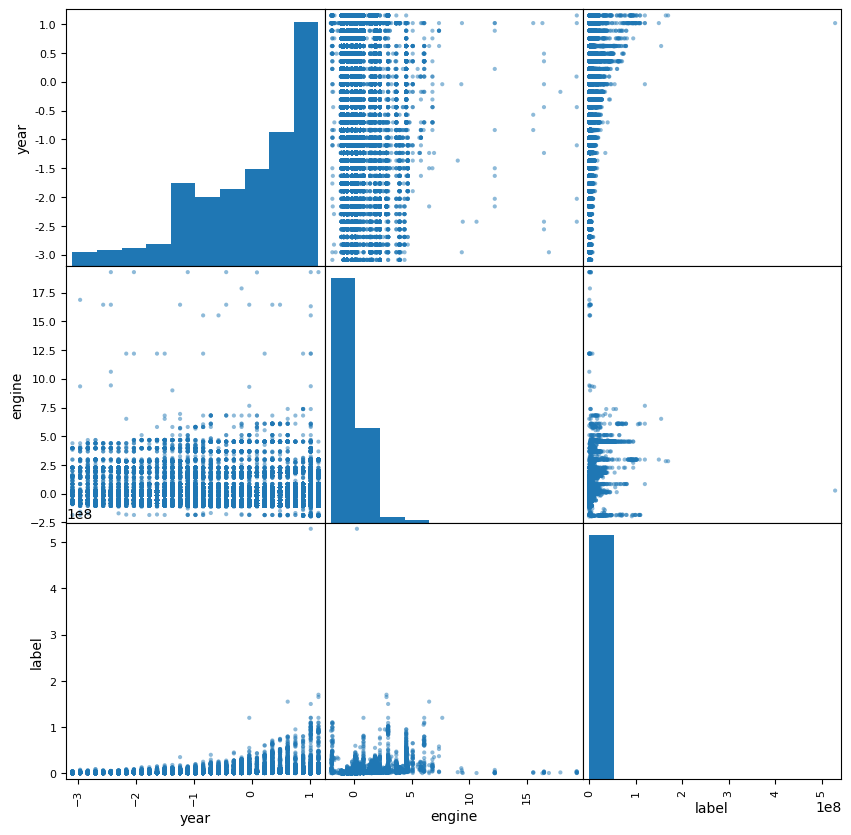

In [558]:
scatter_matrix(temp,figsize=(10,10))
show()

# Final task

Data training and choosing best model by MAE comparing.

In [559]:
xtr , xts , ytr , yts = train_test_split(ready_df,price,test_size=0.15,random_state=42)
print(f'Size of train set : {len(xtr)}\nSize of test set : {len(xts)}')

Size of train set : 66196
Size of test set : 11682


In [560]:
models = [RandomForestRegressor,
          GradientBoostingRegressor,
          LinearRegression,
          Lasso,
          Ridge,
          XGBRegressor,
          KNeighborsRegressor]
results = list()
results_tr = list()
for model in models :
    teacher = model()
    teacher.fit(xtr,ytr)
    preds_tr = teacher.predict(xtr)
    mae = mean_absolute_error(ytr,preds_tr)
    results_tr.append(mae)
    preds = teacher.predict(xts)
    mae = mean_absolute_error(yts,preds)
    results.append(mae)
for i in range(len(results)) :
    if results[i] == min(results) :
        m = models[i]()
        Class = str(m.__class__).split('.')[-1][:-2]
        print(f'{Class} won with mae : {results[i]}')

C:\Users\USER\AppData\Local\Temp\ipykernel_15860\93910103.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  teacher.fit(xtr,ytr)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomForestRegressor won with mae : 539191.516060696


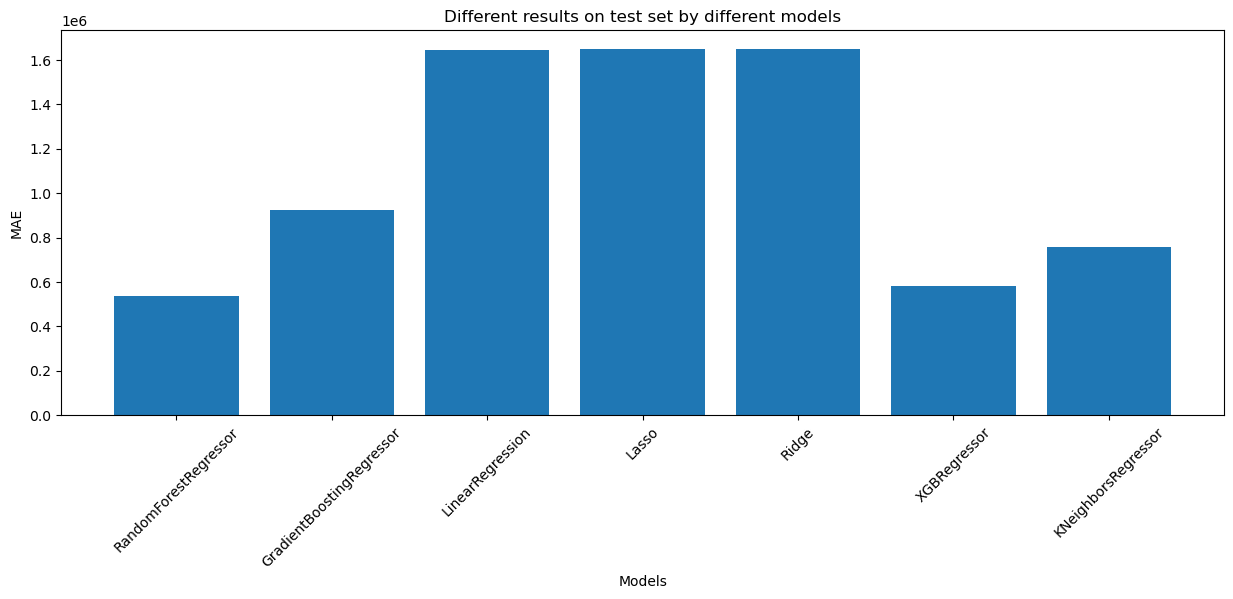

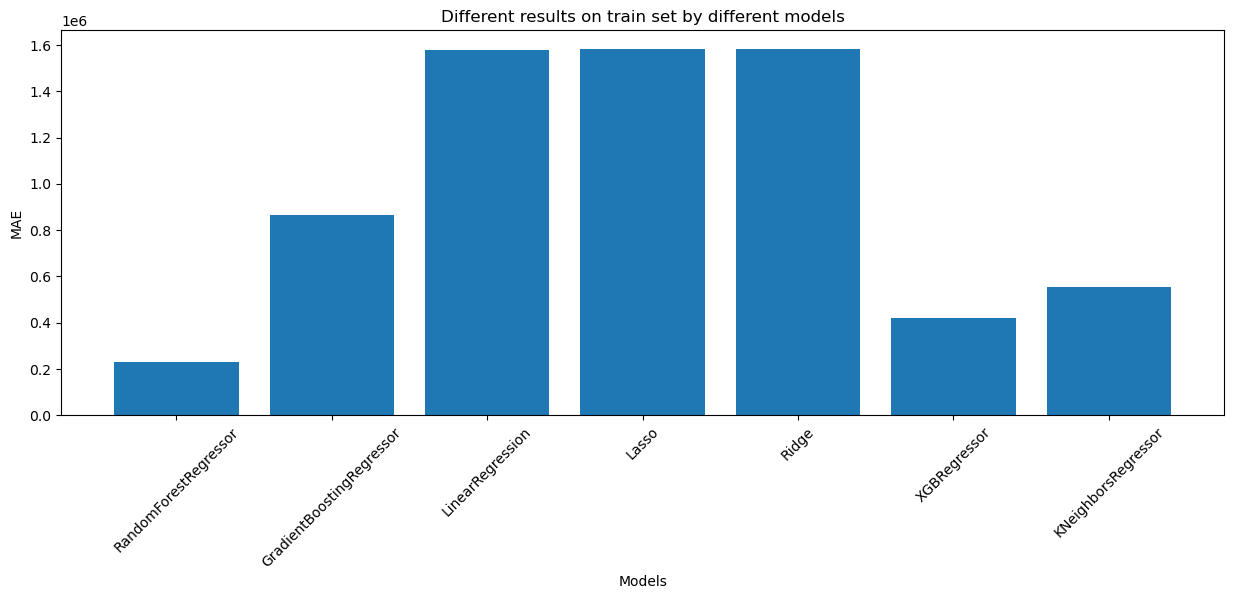

In [561]:
models_name = list()
for m in models :
    alg = m()
    val = str(alg.__class__).split('.')[-1][:-2]
    models_name.append(val)
figure(figsize=(15,5))
bar(models_name,results)
ylabel('MAE')
xlabel('Models')
title('Different results on test set by different models')
xticks(rotation=45)
show()
figure(figsize=(15,5))
bar(models_name,results_tr)
ylabel('MAE')
xlabel('Models')
title('Different results on train set by different models')
xticks(rotation=45)
show()

# End